# Data Preprocessing

In [2]:
!pip install noisereduce
!pip install pedalboard
!pip install librosa

In [3]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

import noisereduce as nr
from pedalboard import *
from scipy.io import wavfile



c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Test Librosa

✅ Loaded: train_9493.wav | Samples: 96001 | Sample Rate: 16000
✅ Loaded: train_9494.wav | Samples: 64801 | Sample Rate: 16000
✅ Loaded: train_9496.wav | Samples: 161601 | Sample Rate: 16000


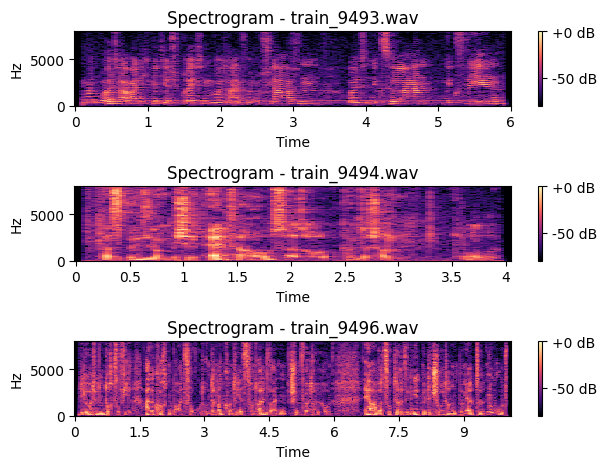

In [9]:
file_path = 'ppl_dataset/'  # Path to your audio file
data_split = ['train', 'val', 'test']  # List of data splits
n =3  # Number of files to load

wav_files = sorted([f for f in os.listdir(os.path.join(file_path, 'train')) if f.endswith('.wav')])[:n]

audio_data = []  

for wav_file in wav_files:
    full_path = os.path.join((os.path.join(file_path, 'train')), wav_file)
    y, sr = librosa.load(full_path, sr=None)
    audio_data.append((y, sr, wav_file))
    print(f"✅ Loaded: {wav_file} | Samples: {len(y)} | Sample Rate: {sr}")

for i, (y, sr, filename) in enumerate(audio_data):
    plt.subplot(n, 1, i + 1)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - {filename}")

plt.tight_layout()
plt.savefig("spectrograms.png", dpi=300)
plt.show()

## Load Data

In [13]:
file_path = 'ppl_dataset/'  # Path to your audio file
data_split = ['train', 'val', 'test']  # List of data splits

wav_files = sorted([f for f in os.listdir(os.path.join(file_path, 'train')) if f.endswith('.wav')])

audio_data = {
    'train': [],
    'val': [],
    'test': []
}

for split in data_split:
    split_path = os.path.join(file_path, split)
    wav_files = sorted([f for f in os.listdir(split_path) if f.endswith('.wav')])

    print(f"\n📂 Loading {split} set: {len(wav_files)} files")

    for wav_file in wav_files:
        full_path = os.path.join(split_path, wav_file)
        y, sr = librosa.load(full_path, sr=None)  
        audio_data[split].append((y, sr, wav_file)) 
        print(f"✅ Loaded: {wav_file} | Samples: {len(y)} | Sample Rate: {sr}")


📂 Loading train set: 8 files
✅ Loaded: train_9493.wav | Samples: 96001 | Sample Rate: 16000
✅ Loaded: train_9494.wav | Samples: 64801 | Sample Rate: 16000
✅ Loaded: train_9496.wav | Samples: 161601 | Sample Rate: 16000
✅ Loaded: train_9497.wav | Samples: 147841 | Sample Rate: 16000
✅ Loaded: train_9498.wav | Samples: 72321 | Sample Rate: 16000
✅ Loaded: train_9499.wav | Samples: 101921 | Sample Rate: 16000
✅ Loaded: train_9500.wav | Samples: 86721 | Sample Rate: 16000
✅ Loaded: train_9501.wav | Samples: 138081 | Sample Rate: 16000

📂 Loading val set: 3 files
✅ Loaded: train_9495.wav | Samples: 131201 | Sample Rate: 16000
✅ Loaded: train_9502.wav | Samples: 79361 | Sample Rate: 16000
✅ Loaded: train_9503.wav | Samples: 59041 | Sample Rate: 16000

📂 Loading test set: 8 files
✅ Loaded: devel_0074.wav | Samples: 137761 | Sample Rate: 16000
✅ Loaded: devel_0075.wav | Samples: 71681 | Sample Rate: 16000
✅ Loaded: devel_0076.wav | Samples: 81441 | Sample Rate: 16000
✅ Loaded: devel_0077.wav 

## Denoising

In [ ]:
for split in data_split:
    for y, sr, filename in audio_data[split]:
        # Noise reduction
        reduced_noise = nr.reduce_noise(y=y, sr=sr, stationary=True, prop_decrease=0.75)
        #Enhancing through pedalboard
        board = Pedalboard([
            NoiseGate(threshold_db=-30, ratio=1.5, release_ms=250),
            Compressor(threshold_db=-16, ratio=4),
            LowShelfFilter(cutoff_frequency_hz=400, gain_db=10, q=1),
            Gain(gain_db=2)
        ])
        effected = board(reduced_noise, sr)
        # Save the processed audio
        save_path = os.path.join(file_path, 'denoised_enhanced_' + split)
        os.makedirs(save_path, exist_ok=True)
        output_path = os.path.join(save_path, filename.replace(".wav", "_processed.wav"))
        wavfile.write(output_path, sr, (effected * 32767).astype(np.int16))
        print(f"✅ Saved: {output_path}")



✅ Saved: ppl_dataset/denoised_enhanced_train\train_9493_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_train\train_9494_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_train\train_9496_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_train\train_9497_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_train\train_9498_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_train\train_9499_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_train\train_9500_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_train\train_9501_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_val\train_9495_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_val\train_9502_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_val\train_9503_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_test\devel_0074_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_test\devel_0075_processed.wav
✅ Saved: ppl_dataset/denoised_enhanced_test\devel_0076_processed.wav
✅ Saved: ppl_dataset/denoised


📂 Loading train set: 8 files
✅ Loaded: train_9493_processed.wav | Samples: 96001 | Sample Rate: 16000
✅ Loaded: train_9494_processed.wav | Samples: 64801 | Sample Rate: 16000
✅ Loaded: train_9496_processed.wav | Samples: 161601 | Sample Rate: 16000
✅ Loaded: train_9497_processed.wav | Samples: 147841 | Sample Rate: 16000
✅ Loaded: train_9498_processed.wav | Samples: 72321 | Sample Rate: 16000
✅ Loaded: train_9499_processed.wav | Samples: 101921 | Sample Rate: 16000
✅ Loaded: train_9500_processed.wav | Samples: 86721 | Sample Rate: 16000
✅ Loaded: train_9501_processed.wav | Samples: 138081 | Sample Rate: 16000

📂 Loading val set: 3 files
✅ Loaded: train_9495_processed.wav | Samples: 131201 | Sample Rate: 16000
✅ Loaded: train_9502_processed.wav | Samples: 79361 | Sample Rate: 16000
✅ Loaded: train_9503_processed.wav | Samples: 59041 | Sample Rate: 16000

📂 Loading test set: 8 files
✅ Loaded: devel_0074_processed.wav | Samples: 137761 | Sample Rate: 16000
✅ Loaded: devel_0075_processed.

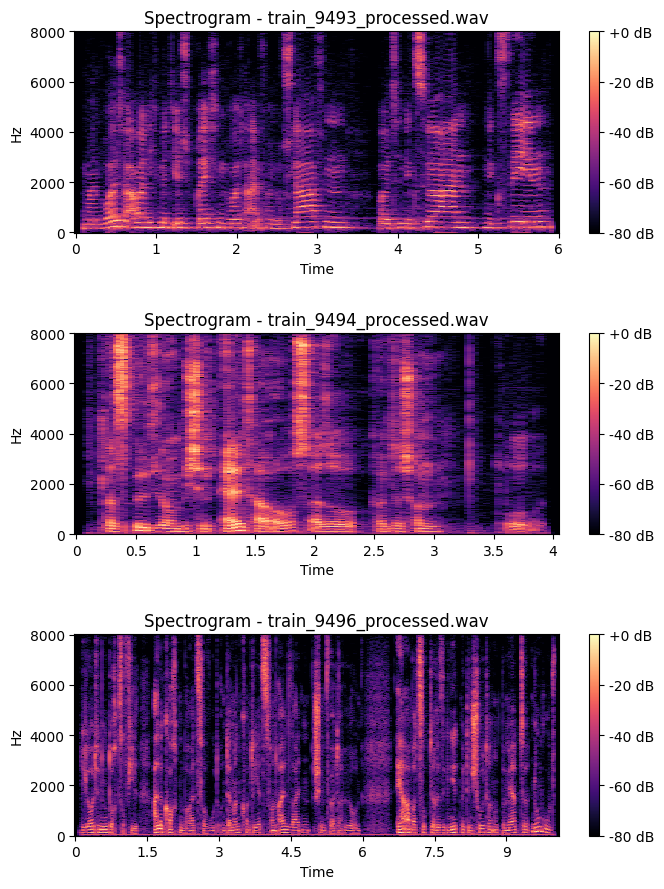

In [39]:
#Loading the processed audio
processed_audio_data = {
    'train': [],
    'val': [],
    'test': []
}
for split in data_split:
    split_path = os.path.join(file_path, 'denoised_enhanced_' + split)
    wav_files = sorted([f for f in os.listdir(split_path) if f.endswith('.wav')])

    print(f"\n📂 Loading {split} set: {len(wav_files)} files")

    for wav_file in wav_files:
        full_path = os.path.join(split_path, wav_file)
        y, sr = librosa.load(full_path, sr=None)  
        processed_audio_data[split].append((y, sr, wav_file)) 
        print(f"✅ Loaded: {wav_file} | Samples: {len(y)} | Sample Rate: {sr}")
# Plotting the processed audio
n = 3
fig, axes = plt.subplots(n, 1, figsize=(7, 3 * n)) 

for i, (y, sr, filename) in enumerate(processed_audio_data['train'][:n]):
    plt.subplot(n, 1, i + 1)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout(h_pad=2.5)  
    plt.title(f"Spectrogram - {filename}")


### Constrast

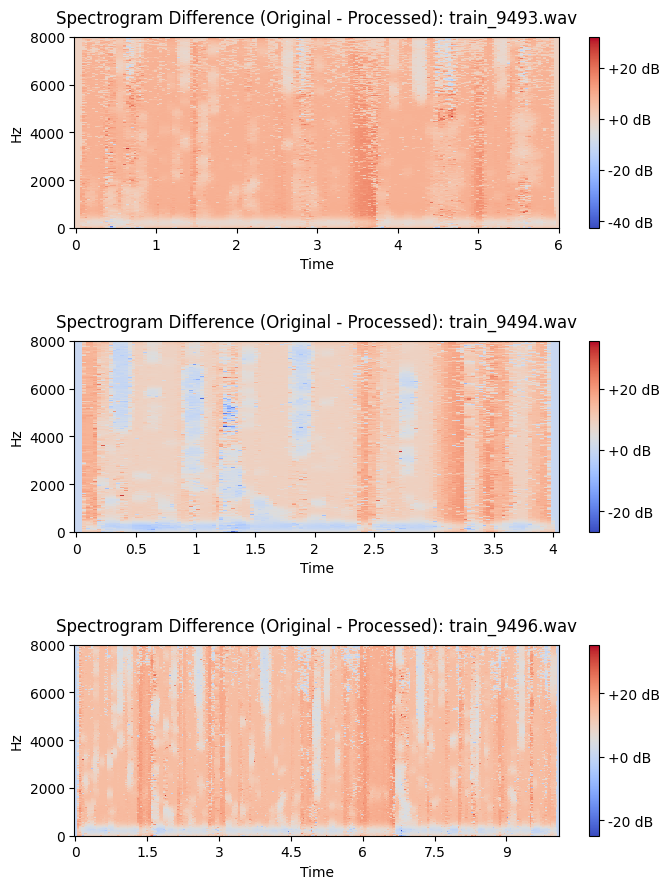

In [ ]:
# plotting the original and processed audio and heatmap
n = 3
split = 'train'

fig, axes = plt.subplots(n, 1, figsize=(7, 3 * n))

for i in range(n):
    y_orig, sr_orig, fname_orig = audio_data[split][i]
    y_proc, sr_proc, fname_proc = processed_audio_data[split][i]

    S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y_orig)), ref=np.max)
    S_proc = librosa.amplitude_to_db(np.abs(librosa.stft(y_proc)), ref=np.max)

    min_shape = (
        min(S_orig.shape[0], S_proc.shape[0]),
        min(S_orig.shape[1], S_proc.shape[1])
    )
    S_orig = S_orig[:min_shape[0], :min_shape[1]]
    S_proc = S_proc[:min_shape[0], :min_shape[1]]

    diff = S_orig - S_proc

    img = librosa.display.specshow(diff, sr=sr_orig, x_axis='time', y_axis='hz', ax=axes[i], cmap='coolwarm')
    axes[i].set_title(f"Spectrogram Difference (Original - Processed): {fname_orig}", pad=10)
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')

plt.tight_layout(h_pad=3.0)
plt.savefig("spectrogram_difference_heatmap.png", dpi=300)
plt.show()



## Loudness Normalization

In [4]:
!pip install pyloudnorm

  Using cached pyloudnorm-0.1.1-py3-none-any.whl.metadata (5.6 kB)
Using cached pyloudnorm-0.1.1-py3-none-any.whl (9.6 kB)


Load Denoised Data

In [23]:
file_path = 'ppl_dataset/'  # Path to your audio file
data_split = ['train', 'val', 'test']  # List of data splits

denoised_audio_data = {
    'train': [],
    'val': [],
    'test': []
}

for split in data_split:
    split_path = os.path.join(file_path, "denoised_enhanced_"+ split)
    wav_files = sorted([f for f in os.listdir(split_path) if f.endswith('.wav')])

    print(f"\n📂 Loading {split} set: {len(wav_files)} files")

    for wav_file in wav_files:
        full_path = os.path.join(split_path, wav_file)
        y, sr = librosa.load(full_path, sr=None)  
        denoised_audio_data[split].append((y, sr, wav_file)) 
        print(f"✅ Loaded: {wav_file} | Samples: {len(y)} | Sample Rate: {sr}")


📂 Loading train set: 8 files
✅ Loaded: train_9493_processed.wav | Samples: 96001 | Sample Rate: 16000
✅ Loaded: train_9494_processed.wav | Samples: 64801 | Sample Rate: 16000
✅ Loaded: train_9496_processed.wav | Samples: 161601 | Sample Rate: 16000
✅ Loaded: train_9497_processed.wav | Samples: 147841 | Sample Rate: 16000
✅ Loaded: train_9498_processed.wav | Samples: 72321 | Sample Rate: 16000
✅ Loaded: train_9499_processed.wav | Samples: 101921 | Sample Rate: 16000
✅ Loaded: train_9500_processed.wav | Samples: 86721 | Sample Rate: 16000
✅ Loaded: train_9501_processed.wav | Samples: 138081 | Sample Rate: 16000

📂 Loading val set: 3 files
✅ Loaded: train_9495_processed.wav | Samples: 131201 | Sample Rate: 16000
✅ Loaded: train_9502_processed.wav | Samples: 79361 | Sample Rate: 16000
✅ Loaded: train_9503_processed.wav | Samples: 59041 | Sample Rate: 16000

📂 Loading test set: 8 files
✅ Loaded: devel_0074_processed.wav | Samples: 137761 | Sample Rate: 16000
✅ Loaded: devel_0075_processed.

In [9]:
import pyloudnorm as pyln       
"""
denoised_audio_data = {
    'train': [tuple(y, sr, filename)],
    'val': [tuple(y, sr, filename)],
    'test': [tuple(y, sr, filename)]
}
"""

target_loudness=-23.0
for split in data_split:
    for y, sr, filename in denoised_audio_data[split]:
        rate = sr
        data = y

        # measure the loudness first 
        meter = pyln.Meter(rate) 
        loudness = meter.integrated_loudness(data)

        # loudness normalize audio to -23 dB LUFS
        loudness_normalized_audio = pyln.normalize.loudness(data, loudness,  target_loudness)

        # Save the processed audio
        save_path = os.path.join(file_path, 'loudness_normalized_' + split)
        os.makedirs(save_path, exist_ok=True)
        output_path = os.path.join(save_path, filename.replace(".wav", "_loudness_normalized.wav"))
        wavfile.write(output_path, sr, (loudness_normalized_audio * 32767).astype(np.int16))
        print(f"✅ Saved: {output_path}")


✅ Saved: ppl_dataset/loudness_normalized_train\train_9493_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_train\train_9494_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_train\train_9496_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_train\train_9497_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_train\train_9498_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_train\train_9499_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_train\train_9500_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_train\train_9501_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_val\train_9495_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_val\train_9502_processed_loudness_normalized.wav
✅ Saved: ppl_dataset/loudness_normalized_val\train_9503_processed_loudness_normalize

Visualization


In [26]:
file_path = 'ppl_dataset/'  # Path to your audio file
data_split = ['train', 'val', 'test']  # List of data splits

normalized_audio_data = {
    'train': [],
    'val': [],
    'test': []
}

for split in data_split:
    split_path = os.path.join(file_path, "loudness_normalized_"+ split)
    wav_files = sorted([f for f in os.listdir(split_path) if f.endswith('.wav')])

    print(f"\n📂 Loading {split} set: {len(wav_files)} files")

    for wav_file in wav_files:
        full_path = os.path.join(split_path, wav_file)
        y, sr = librosa.load(full_path, sr=None)  
        normalized_audio_data[split].append((y, sr, wav_file)) 
        print(f"✅ Loaded: {wav_file} | Samples: {len(y)} | Sample Rate: {sr}")




📂 Loading train set: 8 files
✅ Loaded: train_9493_processed_loudness_normalized.wav | Samples: 96001 | Sample Rate: 16000
✅ Loaded: train_9494_processed_loudness_normalized.wav | Samples: 64801 | Sample Rate: 16000
✅ Loaded: train_9496_processed_loudness_normalized.wav | Samples: 161601 | Sample Rate: 16000
✅ Loaded: train_9497_processed_loudness_normalized.wav | Samples: 147841 | Sample Rate: 16000
✅ Loaded: train_9498_processed_loudness_normalized.wav | Samples: 72321 | Sample Rate: 16000
✅ Loaded: train_9499_processed_loudness_normalized.wav | Samples: 101921 | Sample Rate: 16000
✅ Loaded: train_9500_processed_loudness_normalized.wav | Samples: 86721 | Sample Rate: 16000
✅ Loaded: train_9501_processed_loudness_normalized.wav | Samples: 138081 | Sample Rate: 16000

📂 Loading val set: 3 files
✅ Loaded: train_9495_processed_loudness_normalized.wav | Samples: 131201 | Sample Rate: 16000
✅ Loaded: train_9502_processed_loudness_normalized.wav | Samples: 79361 | Sample Rate: 16000
✅ Loade

Processing train_9493_processed_loudness_normalized.wav...
Processing train_9494_processed_loudness_normalized.wav...
Processing train_9496_processed_loudness_normalized.wav...


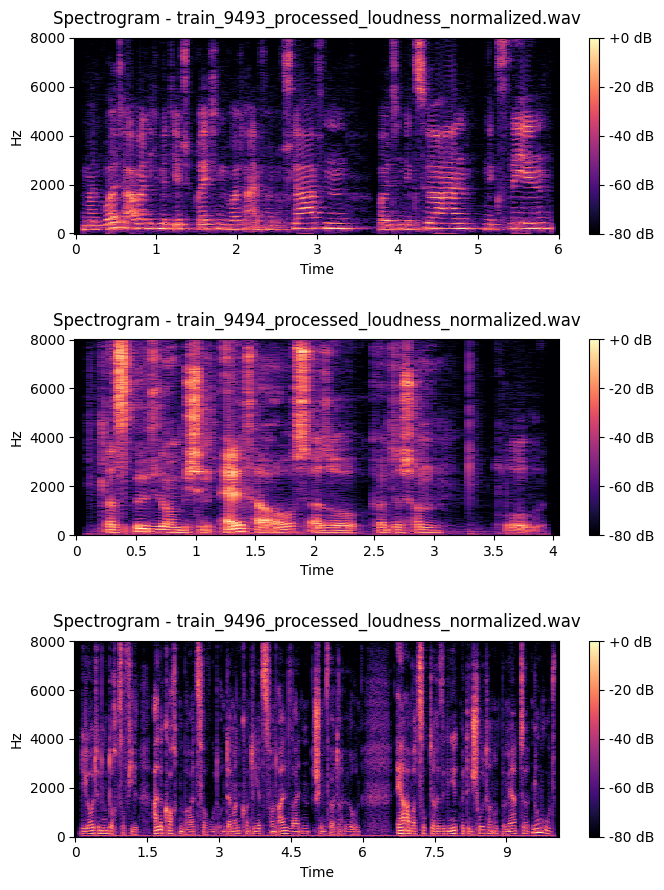

In [20]:
n = 3
fig, axes = plt.subplots(n, 1, figsize=(7, 3 * n)) 

for i, (y, sr, filename) in enumerate(normalized_audio_data['train'][:n]):
    print(f"Processing {filename}...")
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', ax=axes[i])
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')
    axes[i].set_title(f"Spectrogram - {filename}", pad=10)

plt.tight_layout(h_pad=2.5)
plt.savefig("normalized_spectrograms.png", dpi=300)
plt.show()



### Constrast

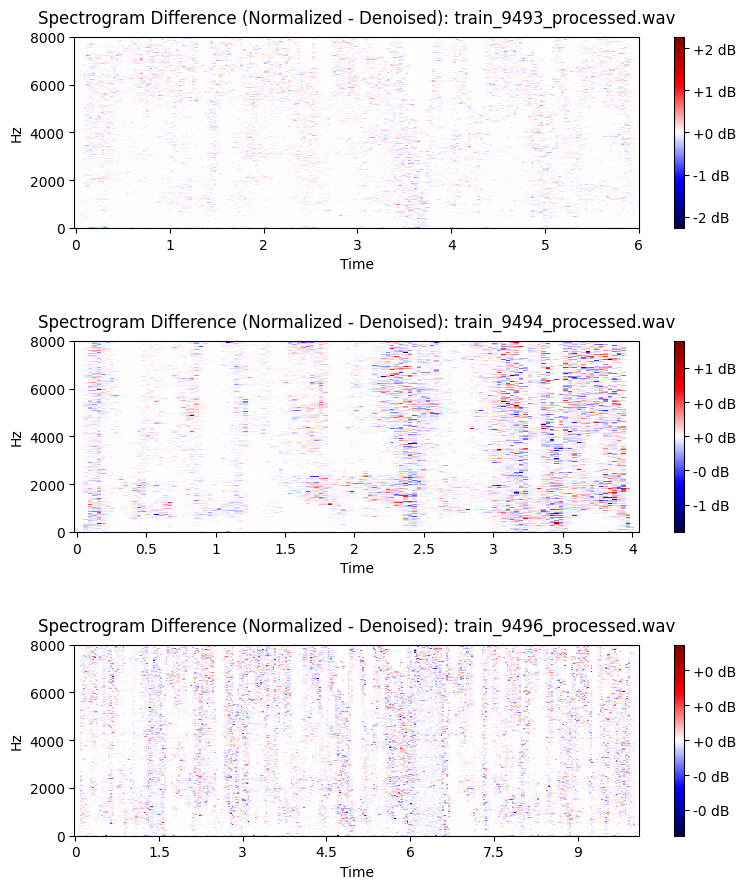

In [28]:

n = 3
split = 'train'

fig, axes = plt.subplots(n, 1, figsize=(8, 3 * n))

for i in range(n):
    y_orig, sr_orig, fname_orig = denoised_audio_data[split][i]
    y_proc, sr_proc, fname_proc = normalized_audio_data[split][i]

    S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y_orig)), ref=np.max)
    S_proc = librosa.amplitude_to_db(np.abs(librosa.stft(y_proc)), ref=np.max)

    min_shape = (
        min(S_orig.shape[0], S_proc.shape[0]),
        min(S_orig.shape[1], S_proc.shape[1])
    )
    S_orig = S_orig[:min_shape[0], :min_shape[1]]
    S_proc = S_proc[:min_shape[0], :min_shape[1]]

    diff = S_proc - S_orig  

    vmax = np.max(np.abs(diff))
    img = librosa.display.specshow(
        diff, sr=sr_orig, x_axis='time', y_axis='hz',
        ax=axes[i], cmap='seismic', vmin=-vmax, vmax=vmax
    )

    axes[i].set_title(f"Spectrogram Difference (Normalized - Denoised): {fname_orig}", pad=10)
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')

plt.tight_layout(h_pad=3.0)
plt.savefig("spectrogram_difference_heatmap.png", dpi=300)
plt.show()


## Pre-emphasis Filter

## Clustering

